### What is the RAG system?


Defination:

This is called retrieval augmented generation (RAG), as you would retrieve the relevant data and use it as augmented context for the LLM. Instead of relying solely on knowledge derived from the training data, a RAG workflow pulls relevant information and connects static LLMs with real-time data retrieval.

![image]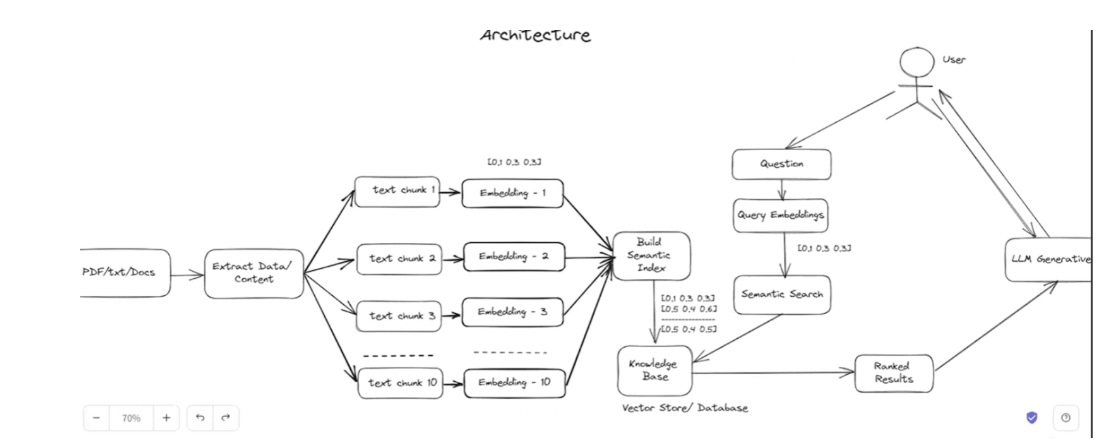

### Why we create a RAG System?

Retrieval systems (RAG) give LLM systems access to factual, access-controlled, timely information.

1) RAG REDUCES HALLUCINATION

Example: In the financial services industry, providing accurate information on investment options is crucial because it directly impacts customers' purchasing decisions and financial well-being. RAG can help ensure that the information generated about stocks, bonds, or mutual funds

2) COST-EFFECTIVE ALTERNATIVE

Example: Banks often need to assess the creditworthiness of potential borrowers. Fine-tuning pre-trained language models to analyse credit histories can be resource-intensive. RAG architecture offers a cost-effective alternative by retrieving relevant financial data and credit history information from existing databases, combining this with pre-trained language models

3) CREDIBLE AND ACCURATE RESPONSES

Example: In customer support, providing accurate and helpful responses is essential for maintaining customer trust, as it demonstrates the company's commitment to providing reliable information and support. The RAG technique is able to do this very effectively by retrieving data from catalogues, policies, and past customer interactions to generate context-aware insights, ensuring that customers receive reliable information on product features, returns, and other inquiries.

4) DOMAIN-SPECIFIC INFORMATION

Example: In the legal industry, clients often require advice specific to their case or jurisdiction because different legal systems have unique rules and regulations, and understanding these nuances is crucial for effective legal representation. RAG can access domain-specific knowledge bases, such as local statutes and case law, to provide tailored information relevant to clients' legal needs.

https://www.advancinganalytics.co.uk/blog/2023/11/7/10-reasons-why-you-need-to-implement-rag-a-game-changer-in-ai

### RAG Practical Usecase

1)Document Question Answering Systems

2)Conversational agents

3)Real-time Event Commentary

4)Content Generation

5)Personalised Recommendation

6)Virtual Assistants

### Installing the necessary libraries

In [1]:
!pip install langchain openai tiktoken rapidocr-onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00


### Fetch the API keys

In [2]:
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [3]:
import os
os.environ['OPENAI_API_KEY']=OPENAI_API_KEY

**RAG Process Starts here**

1. Data Ingestion

2. Data Retrieval

3. Data Generation


### **Data Ingestion**

In [5]:
url = "https://en.wikipedia.org/wiki/State_of_the_Union#:~:text=Though%20the%20language%20of%20the,as%20late%20as%20March%207"

In [6]:
import requests

In [8]:
response = requests.get(url)

In [9]:
response # gives 200 means its fetched correct

<Response [200]>

In [18]:
# response is not getting correct text hence reading text file
with open("state_of_the_union.txt",'r') as file:
  response = file.read()

print(response)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

In [22]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00


In [26]:
from langchain_community.document_loaders import TextLoader
from langchain.vectorstores import FAISS

In [27]:
# loading the data usign loader
loader = TextLoader('state_of_the_union.txt')

In [28]:
document = loader.load()

In [29]:
print(document[0].page_content)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

### Chunking of the Data

### Here is all the text splitter which is available in Langchain

https://python.langchain.com/docs/how_to/#text-splitters


you can visualise the chunking also

https://chunkviz.up.railway.app/

In [30]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [31]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size =500,chunk_overlap=50)

In [32]:
text_chunks = text_splitter.split_documents(document)

In [35]:
print(text_chunks[1].page_content)

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world.


## Storing the embeddings

In [42]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [39]:
#embedddign object
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

<ipython-input-39-ffbfcc59e36a>:2: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)


In [49]:
pip install faiss-cpu

In [47]:
# Storign into the vector store FAISS(Facebook AI similarity Search)
vector_store = FAISS.from_documents(text_chunks,embeddings)

In [52]:
# creating object for retriever to get the data from the vector database
retriever =  vector_store.as_retriever()


In [54]:
# import chatprompt template
from langchain.prompts import ChatPromptTemplate

In [55]:
template = """You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:"""

In [56]:
prompt = ChatPromptTemplate.from_template(template)

In [57]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough # to pass query
from langchain.schema.output_parser import StrOutputParser # to pass my output

In [58]:
output_parser=StrOutputParser()

In [59]:
llm_model=ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")


<ipython-input-59-394d3c7b0376>:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm_model=ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")


In [64]:
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser

)

In [65]:
rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")

'The United States is supporting Ukraine economically and militarily by providing military assistance, economic assistance, and humanitarian assistance. The U.S. is giving more than $1 billion in direct assistance to Ukraine. American forces are not engaged in conflict with Russian forces in Ukraine. Democracies are rising to support Ukraine in the battle between democracy and autocracy. The U.S. stands with the Ukrainian people in their fight for freedom. Putin may have tanks in Kyiv, but he will never gain the hearts and souls of the Ukrainian people. The NATO Alliance was created to secure peace and stability in Europe after World War 2. Ukrainian citizens, from students to retirees, are bravely defending their homeland. President Zelenskyy believes that "light will win over darkness" in the struggle for Ukraine. The U.S. aims to send an unmistakable signal of support to Ukraine and to the world.'

In [66]:
rag_chain.invoke("What action is the U.S. taking to address rising gas prices?")


"The U.S. is releasing 30 Million barrels from its Strategic Petroleum Reserve to address rising gas prices. The country is prepared to take further actions if needed, in coordination with allies. The goal is to help mitigate the impact of high gas prices domestically. The strategy includes targeted sanctions on Russia's economy to ensure the pain is felt there. Additionally, the U.S. has collaborated with 30 other countries to release 60 Million barrels of oil globally. The plan also focuses on boosting domestic production to lower costs and fight inflation. Increasing productive capacity and building a better America are key elements of the strategy. The approach aims to create more jobs and reduce reliance on foreign supply chains. The overall goal is to lower costs for Americans and improve the economy."